# Adding Sparse Tensor Formats
- https://pytorch.org/docs/stable/sparse.html
- Credit to this blog post for images also provides good overview of sparse formats: [here](https://matteding.github.io/2019/04/25/sparse-matrices/)

In [31]:
import torch

# COO
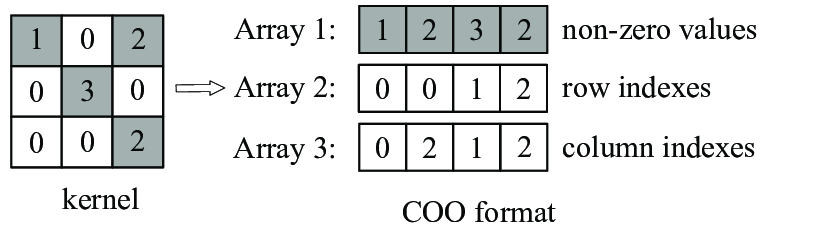

In [15]:
# COO Format 
#i is the index
# len(i) is the number of dimensions of the sparse tensors
# v is the value of said index

i = [[0, 1, 1],[2, 0, 2]]
v =  [3, 4, 5]
s = torch.sparse_coo_tensor(i, v, (2, 3))
print(s)
print(s.to_dense())

tensor(indices=tensor([[0, 1, 1],
                       [2, 0, 2]]),
       values=tensor([3, 4, 5]),
       size=(2, 3), nnz=3, layout=torch.sparse_coo)
tensor([[0, 0, 3],
        [4, 0, 5]])


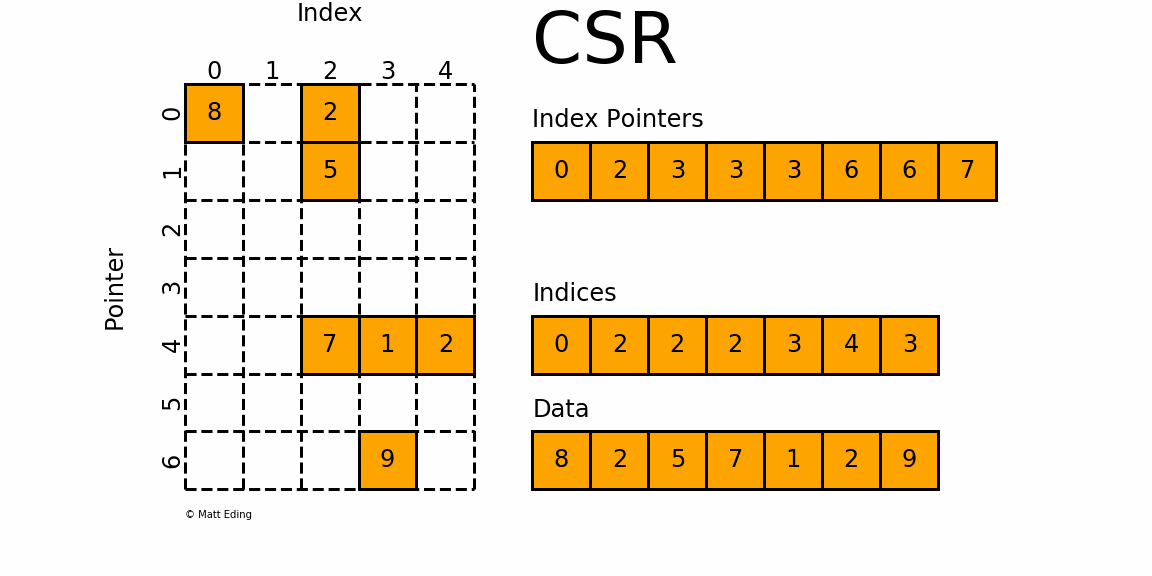

In [17]:
# CSR Format
# Currenlty only suspports 2D tensors. Magma and MKL backend enable faster computations for this format
# len(crow_indices) = mat.size(0) + 1
crow_indices = torch.tensor([0, 2, 4])
col_indices = torch.tensor([0, 1, 0, 1])
values = torch.tensor([1, 2, 3, 4])
csr = torch.sparse_csr_tensor(crow_indices, col_indices, values, dtype=torch.double)
print(csr)
print(csr.to_dense())

tensor(crow_indices=tensor([0, 2, 4]),
       col_indices=tensor([0, 1, 0, 1]),
       values=tensor([1., 2., 3., 4.]), size=(2, 2), nnz=4,
       dtype=torch.float64, layout=torch.sparse_csr)
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [19]:
a = torch.tensor([[0, 0, 1, 0], [1, 2, 0, 0], [0, 0, 0, 0]], dtype = torch.float64)
sp = a.to_sparse_csr()
print(sp)

tensor(crow_indices=tensor([0, 1, 3, 3]),
       col_indices=tensor([2, 0, 1]),
       values=tensor([1., 1., 2.]), size=(3, 4), nnz=3, dtype=torch.float64,
       layout=torch.sparse_csr)


In [20]:
# Note Order Matters
vec = torch.randn(4, 3, dtype=torch.float64)
sp.matmul(vec)

tensor([[ 1.6742,  1.0590,  0.8476],
        [ 2.7668, -5.7237,  4.1353],
        [ 0.0000,  0.0000,  0.0000]], dtype=torch.float64)

In [21]:
torch.matmul(sp,vec)

tensor([[ 1.6742,  1.0590,  0.8476],
        [ 2.7668, -5.7237,  4.1353],
        [ 0.0000,  0.0000,  0.0000]], dtype=torch.float64)

In [37]:
torch.matmul(vec,sp)

RuntimeError: 0Calling addmm on sparse CPU tensors requires Linux platform. Please use PyTorch built with MKL on Linux.

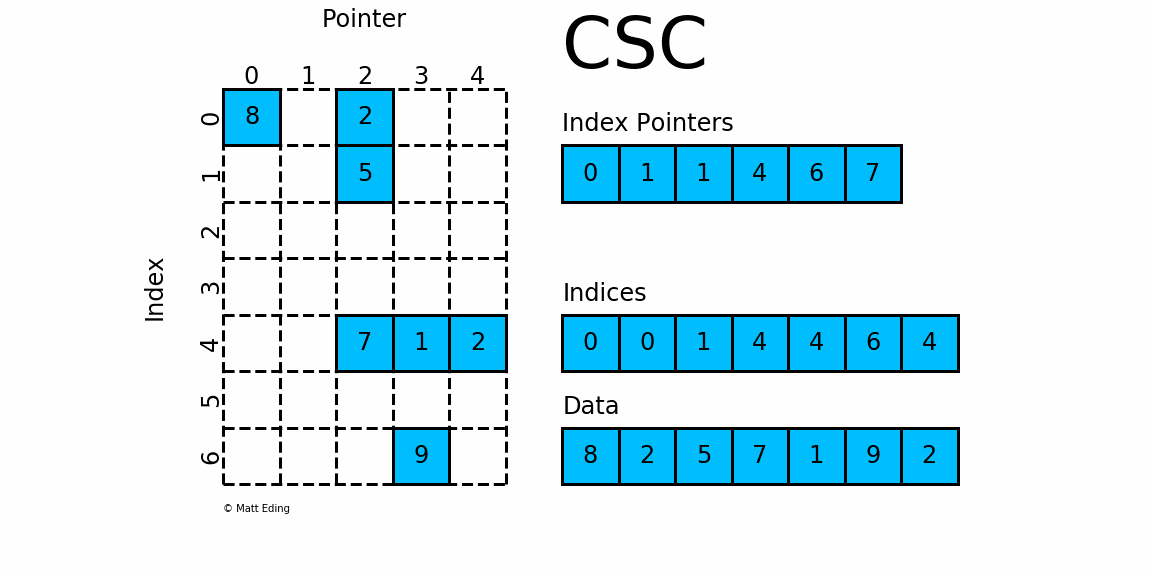

In [29]:
# number of columns is determined but number of rows is not in this case
# Defaults to max(row_indices) for num rows, can pass in size to override
ccol = torch.tensor([0, 2, 4])
row_indices = torch.tensor([0, 1, 0, 1])
values = torch.tensor([1, 2, 3, 4])
csc = torch.sparse_csc_tensor(ccol, row_indices, values,size=(2,2), dtype=torch.double)
print(csc)
print(csc.to_dense())

tensor(ccol_indices=tensor([0, 2, 4]),
       row_indices=tensor([0, 1, 0, 1]),
       values=tensor([1., 2., 3., 4.]), size=(2, 2), nnz=4,
       dtype=torch.float64, layout=torch.sparse_csc)
tensor([[1., 3.],
        [2., 4.]], dtype=torch.float64)


In [30]:
assert torch.allclose(csr.to_dense(), csc.to_dense().T)

#  BSC + BSR Format
- Good scipy ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.bsr_matrix.html

In [43]:
# BSR
crow_indices = [0, 1, 2]
col_indices = [0, 1]
values = [[[1, 2], [-3, 4]], [[5, 6], [7, 8]]]
bsr = torch.sparse_bsr_tensor(torch.tensor(crow_indices, dtype=torch.int64),
    torch.tensor(col_indices, dtype=torch.int64),
    torch.tensor(values), dtype=torch.double, size = (4,4))

# BSC
ccol_indices = [0, 1, 2]
row_indices = [0, 1]
values = [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
bsc = torch.sparse_bsc_tensor(torch.tensor(ccol_indices, dtype=torch.int64),
    torch.tensor(row_indices, dtype=torch.int64),
    torch.tensor(values), dtype=torch.double)
    

In [44]:
print("BSR".center(50,'-'))
print(bsr)
print("Dense BSR".center(50,'-'))
print(bsr.to_dense())

print("BSC".center(50,'-'))
print(bsc)
# SPARSE BSC IS Does not support bsc currently
print("Dense BSC".center(50,'-'))
print("BSC to dense is not currently supported")
# print(bsc.to_dense())
# assert torch.allclose(bsr.to_dense(), bsc.to_dense().T)

-----------------------BSR------------------------
tensor(crow_indices=tensor([0, 1, 2]),
       col_indices=tensor([0, 1]),
       values=tensor([[[ 1.,  2.],
                       [-3.,  4.]],

                      [[ 5.,  6.],
                       [ 7.,  8.]]]), size=(4, 4), nnz=2, dtype=torch.float64,
       layout=torch.sparse_bsr)
--------------------Dense BSR---------------------
tensor([[ 1.,  2.,  0.,  0.],
        [-3.,  4.,  0.,  0.],
        [ 0.,  0.,  5.,  6.],
        [ 0.,  0.,  7.,  8.]], dtype=torch.float64)
-----------------------BSC------------------------
tensor(ccol_indices=tensor([0, 1, 2]),
       row_indices=tensor([0, 1]),
       values=tensor([[[1., 2.],
                       [3., 4.]],

                      [[5., 6.],
                       [7., 8.]]]), size=(4, 4), nnz=2, dtype=torch.float64,
       layout=torch.sparse_bsc)
--------------------Dense BSC---------------------
BSC to dense is not currently supported
